<a href="https://colab.research.google.com/github/mkadamgithubrit/Customer-churn-prediction-using-ANN./blob/main/Customer_churn_prediction_using_ANN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_csv("/content/Customer-Churn-Records1.csv")

In [ ]:
dataset.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
dataset.isnull().sum()

,0
CreditScore,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0
Exited,0


In [ ]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std = StandardScaler()

In [ ]:
x = pd.DataFrame(std.fit_transform(x), columns= x.columns)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow

In [ ]:
from keras.layers import Dense, BatchNormalization
from keras.models import Sequential
from keras.regularizers import L2

In [ ]:
ann = Sequential()

In [ ]:
x.shape

(10000, 8)

In [ ]:
# Initialize the neural network
ann = Sequential()

# Adding the layers
ann.add(Dense(6, input_dim=8, activation="relu", kernel_regularizer=L2(l2=0.02)))
ann.add(BatchNormalization())

ann.add(Dense(4, activation="relu", kernel_regularizer=L2(l2=0.02)))
ann.add(BatchNormalization())

ann.add(Dense(2, activation="relu", kernel_regularizer=L2(l2=0.02)))
ann.add(BatchNormalization())

ann.add(Dense(1, activation="sigmoid"))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ann.compile(optimizer='adam',loss= 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
ann.fit(x_train, y_train, batch_size= 100, epochs=50, validation_data=(x_test,y_test))

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4019 - loss: 1.0519 - val_accuracy: 0.4675 - val_loss: 0.8702
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4430 - loss: 0.8894 - val_accuracy: 0.7325 - val_loss: 0.7920
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6016 - loss: 0.7700 - val_accuracy: 0.8035 - val_loss: 0.7097
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7857 - loss: 0.6873 - val_accuracy: 0.8035 - val_loss: 0.6411
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7889 - loss: 0.6270 - val_accuracy: 0.8035 - val_loss: 0.5841
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7909 - loss: 0.5724 - val_accuracy: 0.8035 - val_loss: 0.5306
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7972 - loss: 0.5237 - val_accuracy: 0.8035 - val_loss: 0.4867
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8040 - loss: 0.4891 - val_accuracy: 0.8035 - val_loss:

In [ ]:
train_acc = ann.history.history['accuracy']
test_acc = ann.history.history['val_accuracy']

In [ ]:
len(train_acc)

50

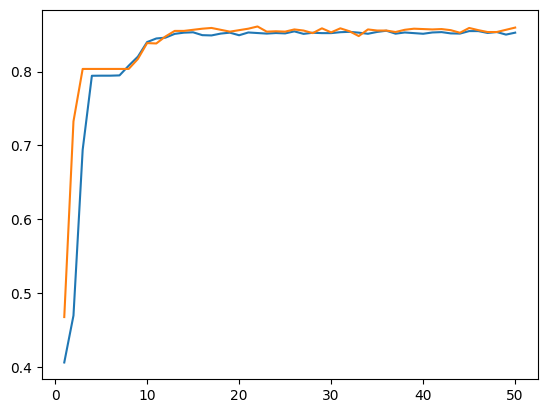

In [ ]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(1,51)], train_acc)
plt.plot([i for i in range(1,51)], test_acc)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
prd = ann.predict(x_test)
prd_data = []
for i in prd:
  if i[0]>0.5:
      prd_data.append(1)
  else:
    prd_data.append(0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [ ]:
# testing data accuracy
accuracy_score(y_test, prd_data)*100

85.95

In [ ]:
prd1 = ann.predict(x_train)
prd_data1 = []
for i in prd1:
  if i[0] > 0.5:
    prd_data1.append(1)
  else:
    prd_data1.append(0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# training accuracy
accuracy_score(y_train, prd_data1)*100

85.46249999999999